In [1]:
from src.solution import MultiODPath, MultiODSolution
from src.problem import MultiODProblem
from src.operators import *
from src.utils import display_result, read_instance_data, get_lkh3_tour, get_ortools_tour

p = MultiODProblem(num_O=8, num_taxi=1, seed=1)
paths = [[0, 1, 9, 8, 16, 5, 17, 2, 4, 3, 7, 12, 6, 14, 13, 11, 10, 15, 0]]
paths1 = [[0, 1, 8, 9, 16, 5, 17, 2, 4, 3, 7, 12, 6, 14, 13, 11, 10, 15, 0]]  # sub-optimal
paths2 = [[0, 1, 9, 8, 16, 5, 17, 3, 2, 7, 4, 12, 6, 14, 13, 11, 10, 15, 0]]  # sub-optimal
paths3 = [[i for i in range(18)] + [0]]
s = MultiODSolution(paths2, p)

/opt/conda/envs/rlor38/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
import os 
instance_name = 'random-005-06203.tsp'
instance_name_head = instance_name[:instance_name.index('.tsp')]
instance = os.path.join('data', 'tsppdlib', 'instances', 'random-uniform', instance_name)
lkh3_dir = os.path.join('..', 'U')
ortools_dir = os.path.join('..', 'tmp', 'ortools')
lkh3_results = os.listdir(lkh3_dir)
ortools_results = os.listdir(ortools_dir)
lkh3_instance_result = [i for i in lkh3_results if instance_name_head in i][0]
ortools_instance_result = [i for i in ortools_results if instance_name_head in i][0]
ortools_tour = get_ortools_tour(os.path.join(ortools_dir, ortools_instance_result))
locations = read_instance_data(instance)
p = MultiODProblem(locations=locations, seed=1)
p.convert_distance_matrix_to_int()
opt_s = get_lkh3_tour(os.path.join(lkh3_dir, lkh3_instance_result))
opt_s = MultiODSolution([opt_s], p)
opt_s_or = get_ortools_tour(os.path.join(ortools_dir, ortools_instance_result))
opt_s_or = MultiODSolution([opt_s_or], p)
si = [[0, 1, 2, 3, 6, 7, 8, 9, 10, 11, 4, 5, 0]]
si = MultiODSolution(si, p)

In [5]:
s = p.generate_feasible_solution()

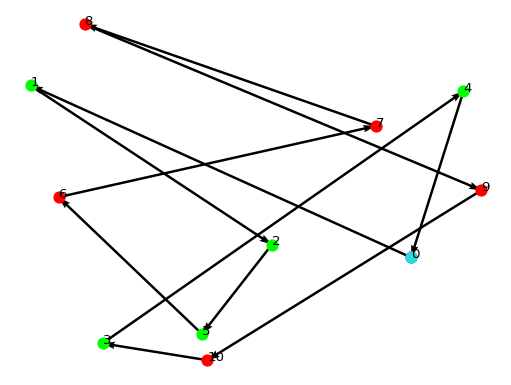

In [10]:
fig = display_result(p, si, display_back_to_dummy=True, custom_o_color='#00FF00', display_title=False, annotate_number=True)

In [6]:
o1 = TwoOptOperator()
o2 = ExchangeOperator()
o3 = InsertOperator()
o4 = OForwardOperator(length=2)
o5 = DBackwardOperator(length=2)
o6 = ODPairsExchangeOperator()
o7 = RandomODPairsExchangeOperator(change_percentage=0.1)
o8 = RandomOForwardOperator(change_percentage=0.1)
o9 = RandomDBackwardOperator(change_percentage=0.1)
o10 = OForwardOperator(length=3)
o11 = SegmentTwoOptOperator()
o12 = OForwardOperator(length=1)
o13 = DBackwardOperator(length=1)
o14 = TwoKOptOperator()
o15 = SameBlockExchangeOperator()
o16 = MixedBlockExchangeOperator()

In [7]:
path = s.paths[0]

In [8]:
path.block_dict

{0: SliceableDeque([Node(node_id=2, OD_type=0, seq_id=2, block_id=0, in_block_seq_id=0, block_OD=0)]),
 1: SliceableDeque([Node(node_id=7, OD_type=1, seq_id=3, block_id=1, in_block_seq_id=0, block_OD=1)]),
 2: SliceableDeque([Node(node_id=5, OD_type=0, seq_id=4, block_id=2, in_block_seq_id=0, block_OD=0)]),
 3: SliceableDeque([Node(node_id=10, OD_type=1, seq_id=5, block_id=3, in_block_seq_id=0, block_OD=1)]),
 4: SliceableDeque([Node(node_id=4, OD_type=0, seq_id=6, block_id=4, in_block_seq_id=0, block_OD=0)]),
 5: SliceableDeque([Node(node_id=9, OD_type=1, seq_id=7, block_id=5, in_block_seq_id=0, block_OD=1)]),
 6: SliceableDeque([Node(node_id=3, OD_type=0, seq_id=8, block_id=6, in_block_seq_id=0, block_OD=0)]),
 7: SliceableDeque([Node(node_id=8, OD_type=1, seq_id=9, block_id=7, in_block_seq_id=0, block_OD=1)]),
 8: SliceableDeque([Node(node_id=6, OD_type=0, seq_id=10, block_id=8, in_block_seq_id=0, block_OD=0)]),
 9: SliceableDeque([Node(node_id=11, OD_type=1, seq_id=11, block_id=9, 

In [9]:
path.OD_mapping

{2: 7, 3: 8, 4: 9, 5: 10, 6: 11}

In [11]:
print(f'before: {path}')
print(f'before cost: {p.calc_cost(s)}')
improved_path, min_delta, label = o16(s)
if improved_path is not None:
    print(f'        {improved_path}')
    print(label)
    print(min_delta)
    print(p.is_feasible(s))
    print(p.calc_cost(s))

before: MultiODPath([0, 1, 2, 7, 5, 10, 4, 6, 3, 8, 9, 11, 0])
before cost: 4832.0


In [16]:
# randomly exchange OD pairs given certain percentage
improved_path, min_delta, label = o11(s)
if improved_path is not None:
    print(improved_path)
    print(p.is_feasible(s))
    print(p.calc_cost(s))
# fig = display_result(p, s)

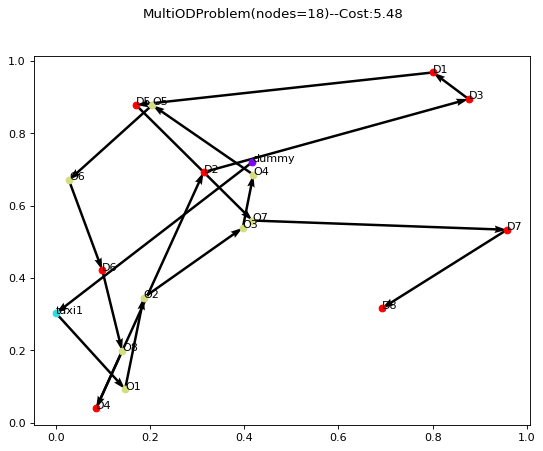

In [6]:
fig = display_result(p, s)

In [2]:
import os 
from src.utils import generate_pdtsp_instance

In [3]:
num_O = 200
num_instances = 5
instance_save_dir = os.path.join('..', 'tmp', 'random-uniform')
lkh3_instance_save_dir = os.path.join('..', 'tmp', 'U')
for _ in range(num_instances):
    generate_pdtsp_instance(num_O, instance_save_to_dir=instance_save_dir, lkh3_instance_save_to_dir=lkh3_instance_save_dir)
    

Instance random-200-04236.tsp saved to ../tmp/random-uniform
Instance random-200-04236.pdtsp saved to ../tmp/U
Instance random-200-02527.tsp saved to ../tmp/random-uniform
Instance random-200-02527.pdtsp saved to ../tmp/U
Instance random-200-16462.tsp saved to ../tmp/random-uniform
Instance random-200-16462.pdtsp saved to ../tmp/U
Instance random-200-04282.tsp saved to ../tmp/random-uniform
Instance random-200-04282.pdtsp saved to ../tmp/U
Instance random-200-13517.tsp saved to ../tmp/random-uniform
Instance random-200-13517.pdtsp saved to ../tmp/U
